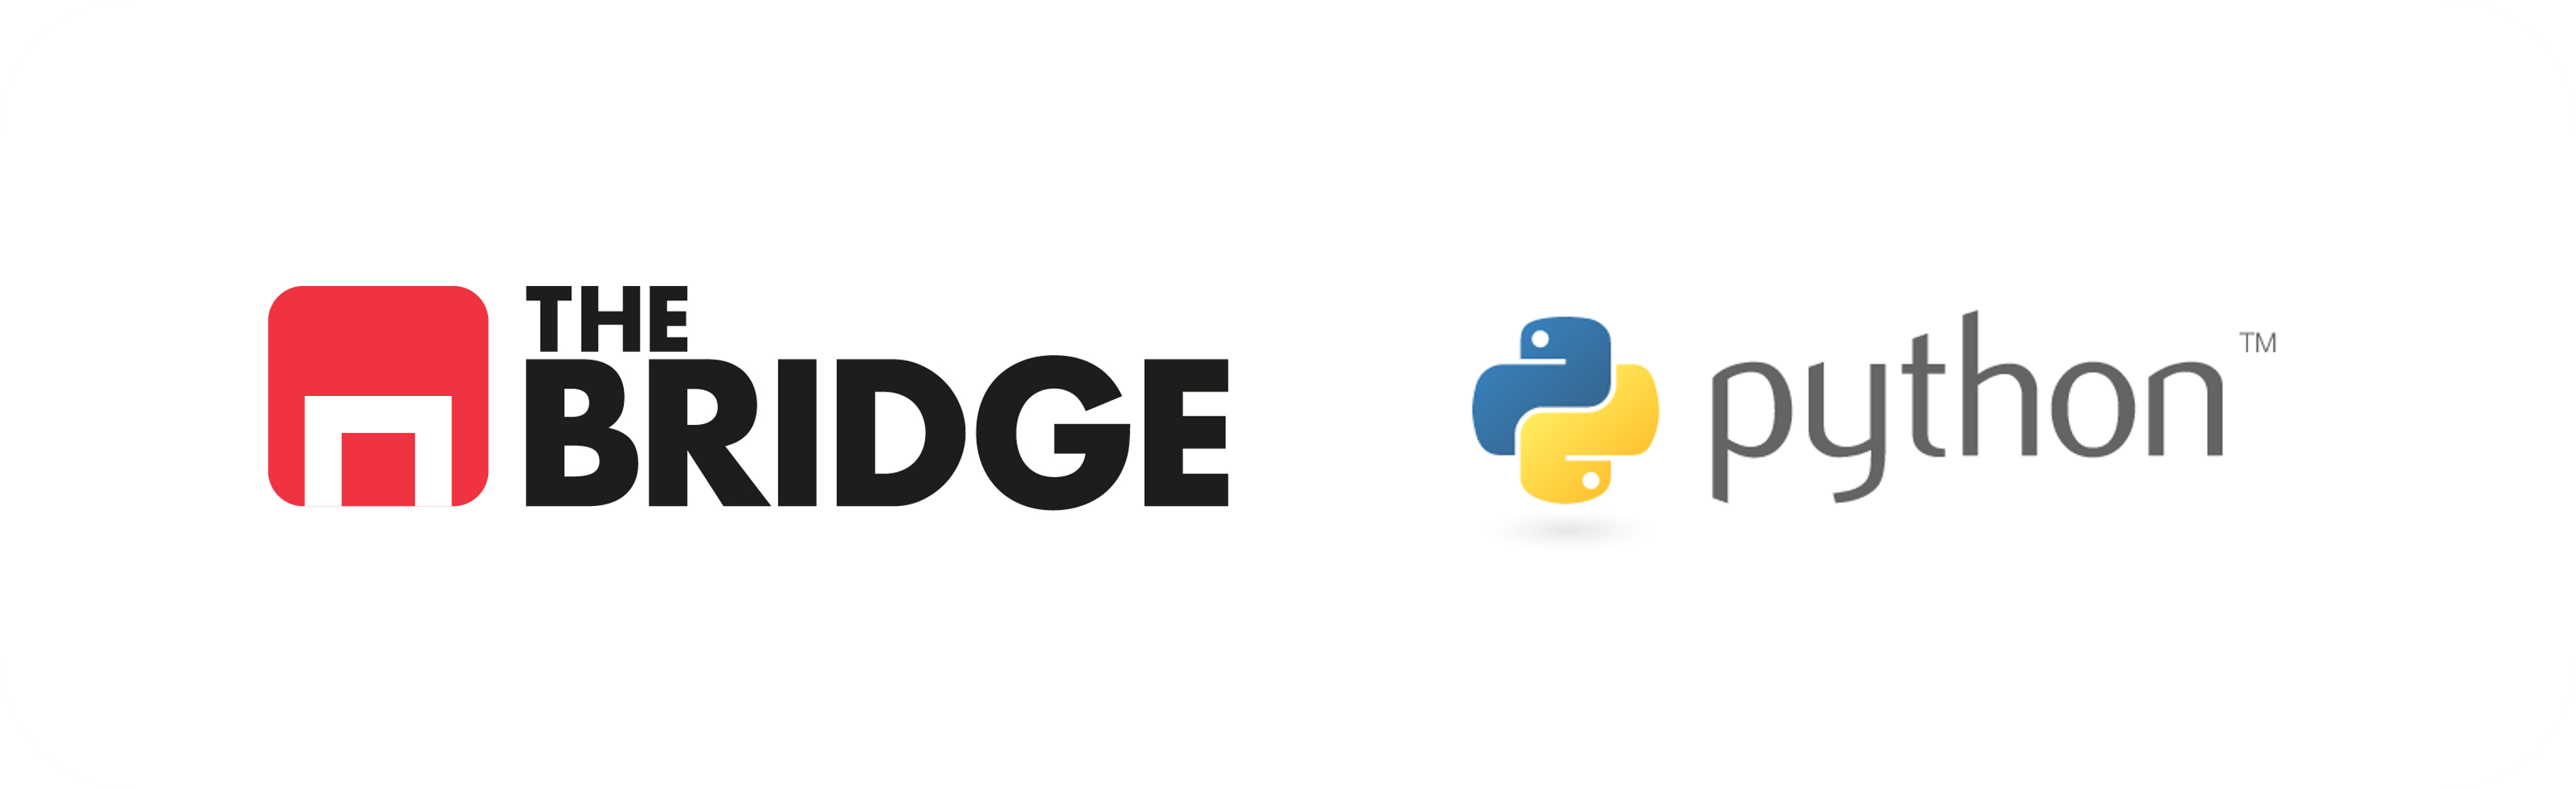

##  Programacion Orientada a Objetos: Ejemplo


### Contenidos 


* [Definición del problema  ](#Definición-del-problema)
* [Solución con programación funcional](#Resolución-funcional)
* [Solución con programación orientada a objetos](#Resolución-OOP)
* [Comparativa](#Comparativa)

### Definición del problema
[al indice](#Contenidos)  

Queremos construir un **programa** que nos sirva para tener un pequeño **gestor de nuestra biblioteca**. Para ello debe permitirnos las siguientes funcionalidades:  

1. Añadir un libro.
2. Eliminar un libro.
3. Buscar un libro por título.
4. Mostrar todos los libros.

Para que veas cómo usar la OOP frente a la programación funcional que hemos utilizado hasta ahora, lo vamos a desarrollar de las dos maneras.

### Resolución funcional
[al indice](#Contenidos) 

In [1]:
def añadir_libro(biblioteca, libro):
    biblioteca.append(libro)

def eliminar_libro(biblioteca, titulo):
    biblioteca[:] = [libro for libro in biblioteca if libro['titulo'] != titulo]
    
def buscar_libro(biblioteca, titulo):
    for libro in biblioteca:
        if libro['titulo'] == titulo:
            return libro
    return None
    
def mostrar_libros(biblioteca):
    for libro in biblioteca:
        print(libro['titulo'])
        print(libro['autor'])
        print("****")

def guardar_biblioteca(biblioteca, fichero):
    pass
    # Hipotetica función que guarda en disco mi biblioteca con sus libros

In [2]:

# Ejemplo de Uso
biblioteca = []
añadir_libro(biblioteca, {'titulo': '1984', 'autor': 'George Orwell'})
añadir_libro(biblioteca, {'titulo': 'Brave New World', 'autor': 'Aldous Huxley'})
print("Buscamos '1984'")
print(buscar_libro(biblioteca, '1984'))  # {'titulo': '1984', 'autor': 'George Orwell'}
print("")
print("Mostramos la biblioteca")
mostrar_libros(biblioteca) 
print("")
print("Eliminamos '1984'")
eliminar_libro(biblioteca, '1984')
print("Mostramos como queda la biblioteca")
mostrar_libros(biblioteca)


Buscamos '1984'
{'titulo': '1984', 'autor': 'George Orwell'}

Mostramos la biblioteca
1984
George Orwell
****
Brave New World
Aldous Huxley
****

Eliminamos '1984'
Mostramos como queda la biblioteca
Brave New World
Aldous Huxley
****


### Resolución OOP
[al indice](#Contenidos) 

In [3]:
class Libro:
    def __init__(self, titulo, autor):
        self.titulo = titulo
        self.autor = autor

    def print_datos(self):
        print("Titulo:", self.titulo)
        print("Autor:", self.autor)
        return self.titulo
    


In [4]:

class Biblioteca:
    def __init__(self):
        self.libros = []

    def añadir_libro(self, libro):
        self.libros.append(libro)
        
    def eliminar_libro(self, titulo):
        self.libros = [libro for libro in self.libros if libro.titulo != titulo]
    
    def buscar_libro(self, titulo):
        for libro in self.libros:
            if libro.titulo == titulo:
                libro.print_datos()
                return libro
        return None

    def mostrar_libros(self):
        for libro in self.libros:
            libro.print_datos()

    def guardar_biblioteca(self):
        pass
        # Método hipotético que guarda en disco mi blibioteca y sus libros

In [5]:

# Ejemplo de Uso
biblioteca = Biblioteca()
biblioteca.añadir_libro(Libro('1984', 'George Orwell'))
biblioteca.añadir_libro(Libro('Brave New World', 'Aldous Huxley'))
print("Buscamos 1984:")
libro = biblioteca.buscar_libro('1984')  # 1984
print(" ")
print("Mostramos la biblioteca")
biblioteca.mostrar_libros()
print("")
print("Eliminamos 1984") 
biblioteca.eliminar_libro('1984')
biblioteca.mostrar_libros()


Buscamos 1984:
Titulo: 1984
Autor: George Orwell
 
Mostramos la biblioteca
Titulo: 1984
Autor: George Orwell
Titulo: Brave New World
Autor: Aldous Huxley

Eliminamos 1984
Titulo: Brave New World
Autor: Aldous Huxley


### Comparativa
[al indice](#Contenidos) 

A simple vista puede parecer que es más o menos lo mismo, y siempre podremos hacerlas equivalentes. Lo importante es la facilidad y el cambio de paradigma. El pensar en objetos nos permite gestionarlos mejor. Por ejemplo piensa en la siguiente modificación aparentemente sencilla...

*Quiero ponerle nombre a mi biblioteca, porque quiero distinguir la de libros en español de la de libros en inglés*

 

#### Modificación 1, programación funcional

En el caso de la programación funcional, tendría que cambiar mi biblioteca por algo como:

```Python
biblioteca = {
    "nombre": "Libros_español",
    "libros": []}
```

pero... ahora tendría que cambiar todas las funciones definidas anteriormente para que consideraran el nuevo cambio... Echa un vistazo a las funciones y piensa cuantas tendrías que tocas y cómo...

#### Modificación 1, programación OOP

En el caso de la programación orientada a objetos, me llega con cambiar el constructor

```Python
def __init__(self, nombre):
    self.nombre = nombre
    self.libros  = []
```

Hmmm, ¿le vas viendo las ventajas?

Siendo más prolijo:

1. Claro y estructurado: Con la POO, dividimos claramente el concepto de Libro y Biblioteca en clases separadas. Esto hace que el código sea más modular y fácil de entender.

2. Reusabilidad: Con la clase Libro, podemos reutilizarla en otros contextos (por ejemplo, una tienda, una revisión de libros, etc.), sin tener que reescribir la lógica.

3. Extensibilidad: Si en el futuro queremos agregar características adicionales a Libro (como año de publicación, género, etc.) o a Biblioteca (como préstamos, reservas, etc.), sería más fácil y organizado hacerlo con la estructura de la POO.

4. Estado encapsulado: En la versión orientada a objetos, la lista de libros está "oculta" dentro de la clase Biblioteca, evitando que se manipule directamente desde fuera.

En resumen, mientras que la solución funcional es más directa y menos verbosa para problemas más simples, la solución orientada a objetos ofrece una estructura clara, modularidad, reusabilidad y extensibilidad para problemas más complejos, como este